# Wieloliniowa regresja przy użyciu SVD i pseudoodwrotności

Cel ćwiczenia: należy rozwiązać problem wieloliniowej regresji postaci:
$$y = a \cdot x_1 + b \cdot x_2$$

gdzie współczynniki **a** i **b** szukane są na podstawie danych z pliku `war3.csv`.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = [12, 6]

data = pd.read_csv('war3.csv', sep=';', decimal=',')
print('Dane wczytane:')
print(data.head(10))
print(f'Rozmiar: {data.shape}')

# Przygotowanie macierzy A (cechy: x1, x2) i wektora b (cel: y)
x1 = data['x1'].values
x2 = data['x2'].values
y = data['y'].values

A = np.column_stack([x1, x2]) 
b = y  

print(f'\nMacierz A (n x m): {A.shape}')
print(f'Wektor b: {b.shape}')


Dane wczytane:
   x1  x2           y
0   1   2    8.569557
1   3   6   48.411175
2   5  10   34.057325
3   7  14   77.348654
4   9  18  124.382266
5  11  22  168.861534
6  13  26  104.431389
7  15  30  236.868787
8  17  34  303.804549
9  19  38  233.310193
Rozmiar: (110, 3)

Macierz A (n x m): (110, 2)
Wektor b: (110,)


In [10]:
# Obliczenie SVD macierzy A
U, S, VT = np.linalg.svd(A, full_matrices=False)

print('=== ROZKŁAD SVD ===')
print(f'U: {U.shape}')
print(f'S: {S.shape}')
print(f'VT: {VT.shape}')
print(f'Singularne wartości: {S}')

# Liczba warunkowa (condition number)
kappa = S[0] / S[-1]
print(f'\nLiczba warunkowa κ(A) = σ_max / σ_min = {kappa:.6e}')

# Pseudoodwrotność A⁺ = V * Σ⁻¹ * Uᵀ
S_inv = np.diag(1.0 / S)
A_pinv = VT.T @ S_inv @ U.T

print(f'\nPseudoodwrotność A⁺: {A_pinv.shape}')
print(f'Weryfikacja A⁺ @ A (powinno być bliskie identyczności):')
print(A_pinv @ A)


=== ROZKŁAD SVD ===
U: (110, 2)
S: (2,)
VT: (2, 2)
Singularne wartości: [2.97878331e+03 1.93368602e-13]

Liczba warunkowa κ(A) = σ_max / σ_min = 1.540469e+16

Pseudoodwrotność A⁺: (2, 110)
Weryfikacja A⁺ @ A (powinno być bliskie identyczności):
[[0.97332764 1.94665527]
 [0.05070496 0.10140991]]


In [11]:
# Rozwiązanie za pomocą SVD: x = A⁺ b
x_svd = A_pinv @ b

# Rozwiązanie za pomocą np.linalg.pinv (dla porównania)
x_pinv = np.linalg.pinv(A) @ b

print('ROZWIĄZANIA')
print(f'Przy pomocy SVD: a={x_svd[0]:.6f}, b={x_svd[1]:.6f}')
print(f'Przy pomocy np.linalg.pinv: a={x_pinv[0]:.6f}, b={x_pinv[1]:.6f}')

# Przewidywania
y_pred_svd = A @ x_svd
y_pred_pinv = A @ x_pinv

# Błędy
error_svd = np.linalg.norm(y - y_pred_svd)
error_pinv = np.linalg.norm(y - y_pred_pinv)

print(f'\n=== BŁĘDY ===')
print(f'Błąd || A x_svd - b ||₂: {error_svd:.6f}')
print(f'Błąd || A x_pinv - b ||₂: {error_pinv:.6f}')

# Średni błąd kwadratowy
mse_svd = error_svd**2 / len(b)
mse_pinv = error_pinv**2 / len(b)
print(f'MSE (SVD): {mse_svd:.6f}')
print(f'MSE (pinv): {mse_pinv:.6f}')


ROZWIĄZANIA
Przy pomocy SVD: a=-962184798432239.875000, b=481092399216125.375000
Przy pomocy np.linalg.pinv: a=2.288667, b=4.577333

=== BŁĘDY ===
Błąd || A x_svd - b ||₂: 6275.426897
Błąd || A x_pinv - b ||₂: 6222.790899
MSE (SVD): 358008.934048
MSE (pinv): 352028.423379


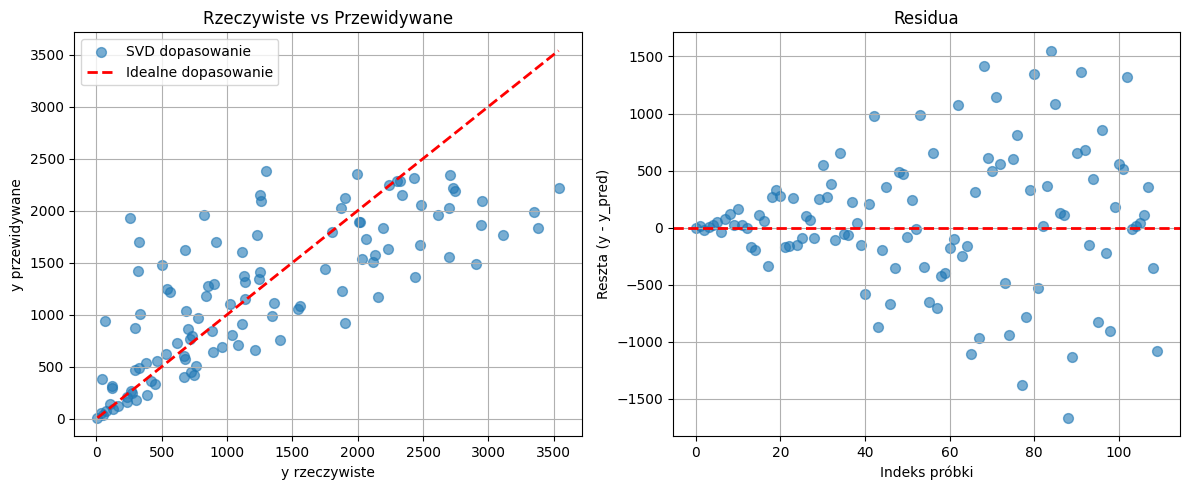

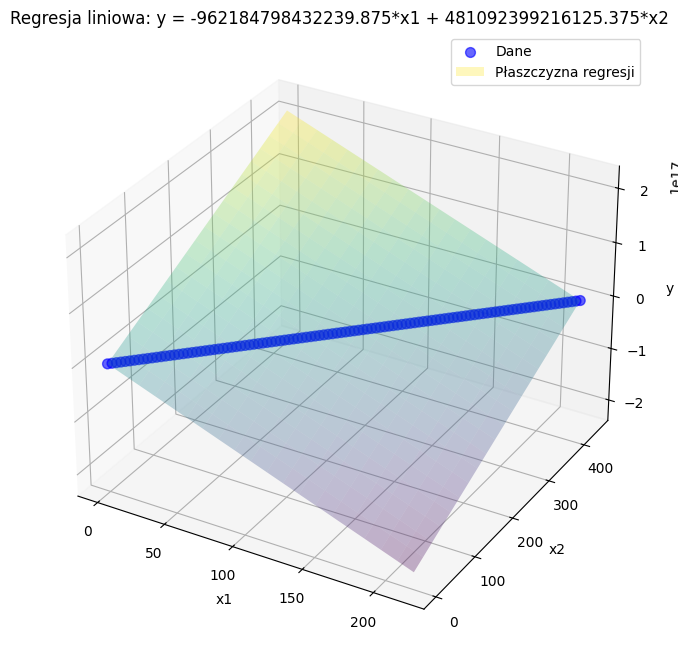

In [12]:
# Wizualizacja 3D: dane i płaszczyzna regresji
fig = plt.figure(figsize=(12, 5))

# Plot 1: Dane rzeczywiste vs przewidywane
ax1 = fig.add_subplot(121)
ax1.scatter(y, y_pred_svd, alpha=0.6, s=50, label='SVD dopasowanie')
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Idealne dopasowanie')
ax1.set_xlabel('y rzeczywiste')
ax1.set_ylabel('y przewidywane')
ax1.set_title('Rzeczywiste vs Przewidywane')
ax1.legend()
ax1.grid(True)

# Plot 2: Residua (reszty)
residuals = y - y_pred_svd
ax2 = fig.add_subplot(122)
ax2.scatter(range(len(residuals)), residuals, alpha=0.6, s=50)
ax2.axhline(y=0, color='r', linestyle='--', lw=2)
ax2.set_xlabel('Indeks próbki')
ax2.set_ylabel('Reszta (y - y_pred)')
ax2.set_title('Residua')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Plot 3D: Punkty danych i płaszczyzna regresji
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Dane rzeczywiste
ax.scatter(x1, x2, y, c='blue', s=50, alpha=0.6, label='Dane')

# Płaszczyzna regresji: y = a*x1 + b*x2
x1_grid = np.linspace(x1.min(), x1.max(), 20)
x2_grid = np.linspace(x2.min(), x2.max(), 20)
X1, X2 = np.meshgrid(x1_grid, x2_grid)
Y = x_svd[0] * X1 + x_svd[1] * X2

ax.plot_surface(X1, X2, Y, alpha=0.3, cmap='viridis', label='Płaszczyzna regresji')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title(f'Regresja liniowa: y = {x_svd[0]:.3f}*x1 + {x_svd[1]:.3f}*x2')
ax.legend()

plt.show()


## Podsumowanie

### Rozwiązanie problemu regresji

Szukanie współczynników **a** i **b** takich, że:
$$y \approx a \cdot x_1 + b \cdot x_2$$

Rozwiązanie otrzymano za pomocą pseudoodwrotności Moore'a–Penrose'a:
$$\mathbf{x} = A^+ \mathbf{b}$$

gdzie $A^+ = \tilde{V} \tilde{\Sigma}^{-1} \tilde{U}^T$ obliczana z rozkładu SVD.

### Interpretacja

- Liczba warunkowa κ(A) informuje o wrażliwości rozwiązania na małe zaburzenia w danych. Jeśli κ jest duża, rozwiązanie jest wrażliwe na szum.
- Błąd najmniejszych kwadratów mierzył, jak dobrze model dopasowuje się do danych.
- Płaszczyzna regresji przechodzi przez "centralną" tendencję danych w przestrzeni (x₁, x₂, y).